In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [105]:
df = pd.read_csv("data/lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


## Fjerner forklaringsvariabler vi ikke trenger

In [106]:
df2 = df[["Theme", "Price", "Pieces", "Pages", "Minifigures"]]

## Fjerner observasjoner med manglende datapunkter

In [107]:
df2 = df2.dropna()

## Gjør themes om til string og fjern alle tegn vi ikke vil ha med

In [108]:
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

## Fjerner dollartegn og trademark-tegn fra datasettet

In [109]:
df2['Price'].astype(str)
df2['Price'] = df2['Price'].str.replace(r'\$', '', regex = True)

## Gjør så prisen om til float

In [110]:
df2['Price'] = df2['Price'].astype(float)

df2

,Theme,Price,Pieces,Pages,Minifigures
13,Friends,7.99,95.0,40.0,1.0
16,Disney,9.99,69.0,28.0,1.0
17,Friends,7.99,85.0,36.0,1.0
18,Friends,7.99,93.0,40.0,2.0
19,City,9.99,92.0,36.0,1.0
...,...,...,...,...,...
1171,Batman,249.99,3306.0,404.0,3.0
1172,Ideas,199.99,3036.0,428.0,4.0
1173,THE LEGO MOVIE 2,299.99,3178.0,452.0,13.0
1174,Jurassic World,249.99,3120.0,464.0,6.0


## Enkel lineær regresjon

In [111]:
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3828.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          2.59e-289
Time:                        21:03:38   Log-Likelihood:                -3206.2
No. Observations:                 717   AIC:                             6416.
Df Residuals:                     715   BIC:                             6426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1957      0.982     10.378      0.000       8.267      12.125
Pieces         0.0874      0.001     61.874      0.000       0.085       0.090
==============================================================================
Omnibus:                      662.393   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61798.469
Skew:                           3.719   Prob(JB):                         0.00
Kurtosis:                      47.869   Cond. No.                         863.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Enkel LR med regresjonslinje

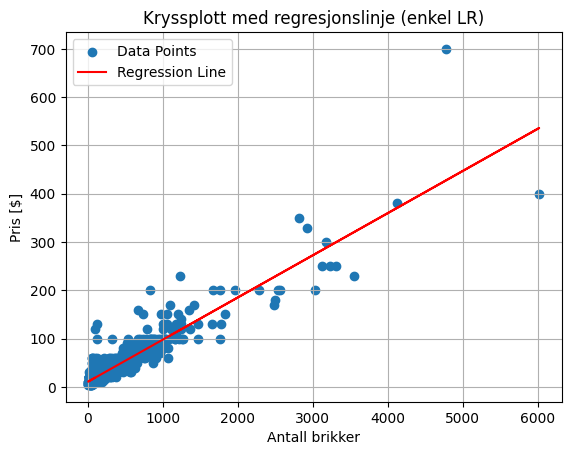

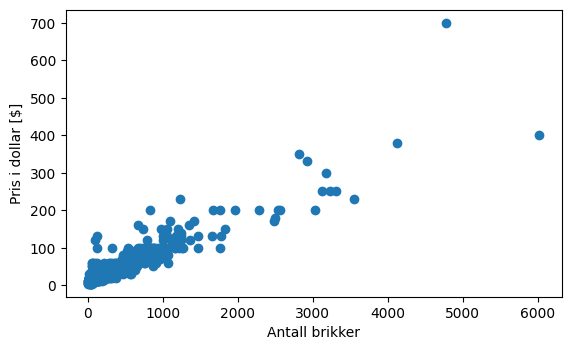

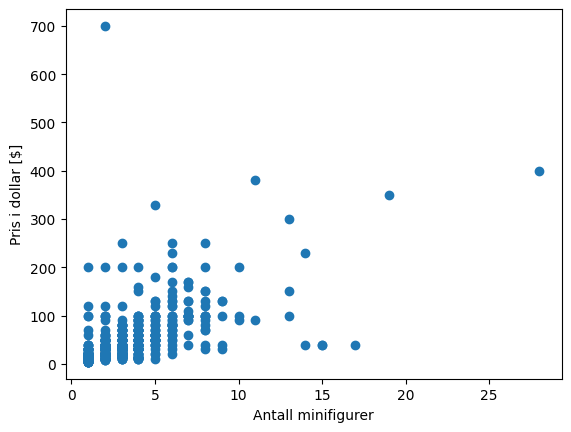

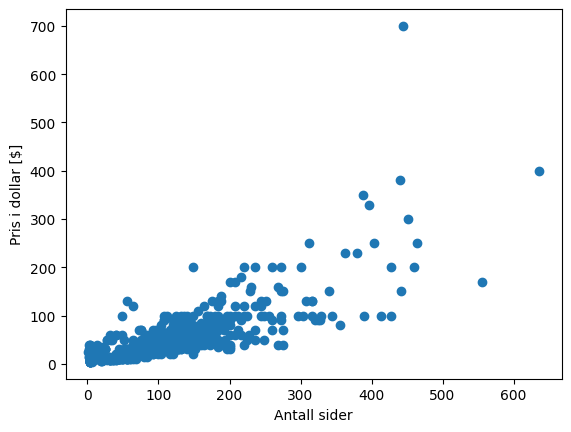

In [112]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()
# Antall brikker mot pris
plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()
# Minifigurer mot pris
plt.scatter(df2['Minifigures'], df2['Price'])
plt.xlabel('Antall minifigurer')
plt.ylabel('Pris i dollar [$]')
plt.gca()
plt.show()
# Antall sider mot pris
plt.scatter(df2['Pages'], df2['Price'])
plt.xlabel('Antall sider')
plt.ylabel('Pris i dollar [$]')
plt.gca()
plt.show()

Farging

### Variabler for varemerke og ikke varemerke

# TODO Correct variables, is missing Amazone prices a reason? for certain themes not appearing?

In [113]:
mythemes_brands = ['Disney', 'Unikitty', 'NINJAGO', 'Marvel', 'THE LEGO MOVIE 2', 'Harry Potter', 'LEGO Frozen 2', 'Minions', 
                   'Jurassic World', 'DC', 'Monkie Kid']
mythemes_notBrands = ['Friends', 'City', 'DUPLO', 'Speed Champions', 'Hidden Side', 'Classic', 'Juniors', 'Creator 3-in-1', 
                      'Ideas', 'Creator Expert', 'Powered up', 'LEGO Education']
mythemes_unclearBrands = ['Star Wars', 'Minecraft', 'Batman', 'Trolls World Tour', 'Powerpuff Girls', 'Overwatch', 'Spider-Man', 
                          'Stranger Things', 'Minifigures']

In [117]:
df2.groupby(['Theme']).size().reset_index(name = 'Count')

,Theme,Count
0,Batman,16
1,City,94
2,Classic,4
3,Creator 3-in-1,21
4,Creator Expert,10
5,DC,9
6,DUPLO,32
7,Disney,35
8,Friends,94
9,Harry Potter,23


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


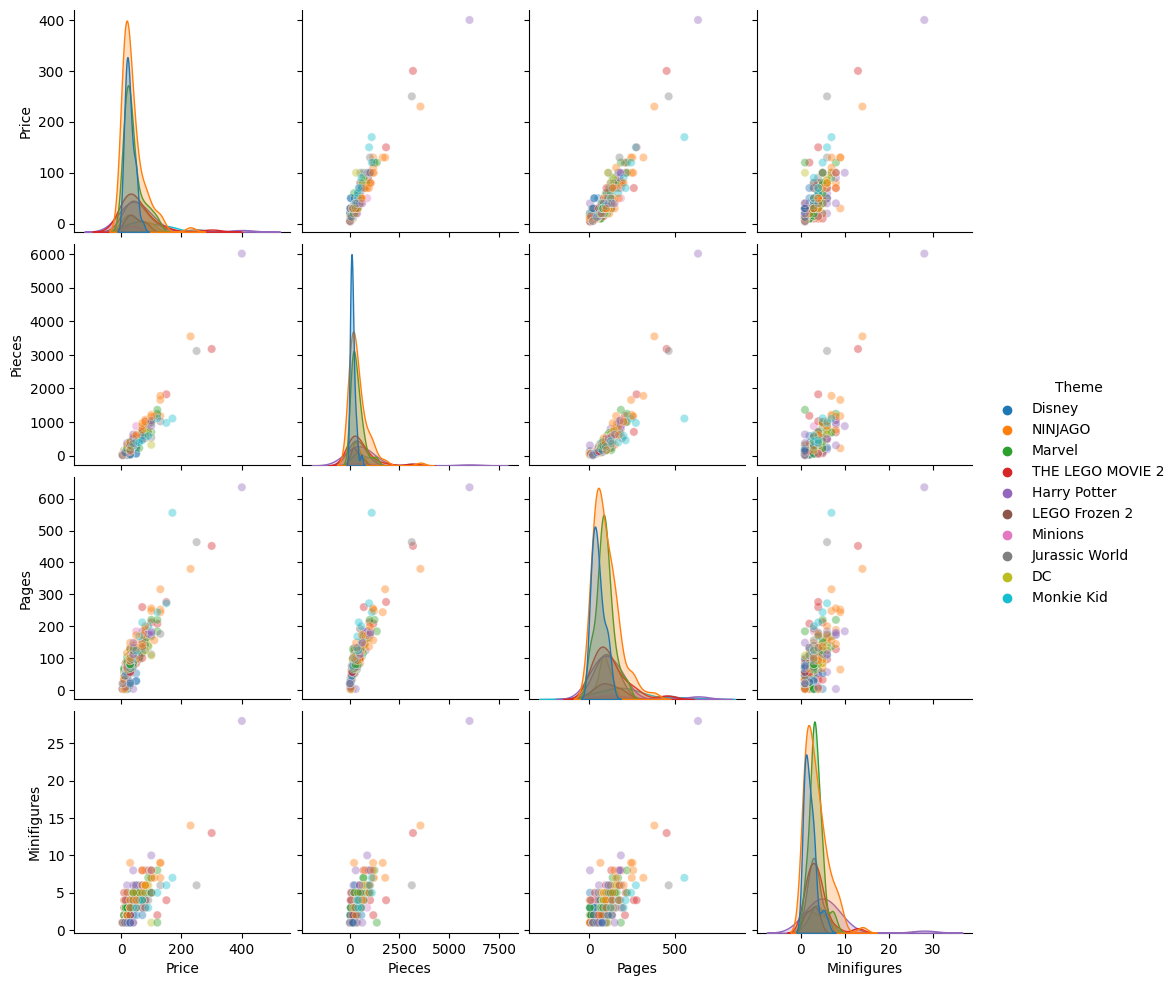

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


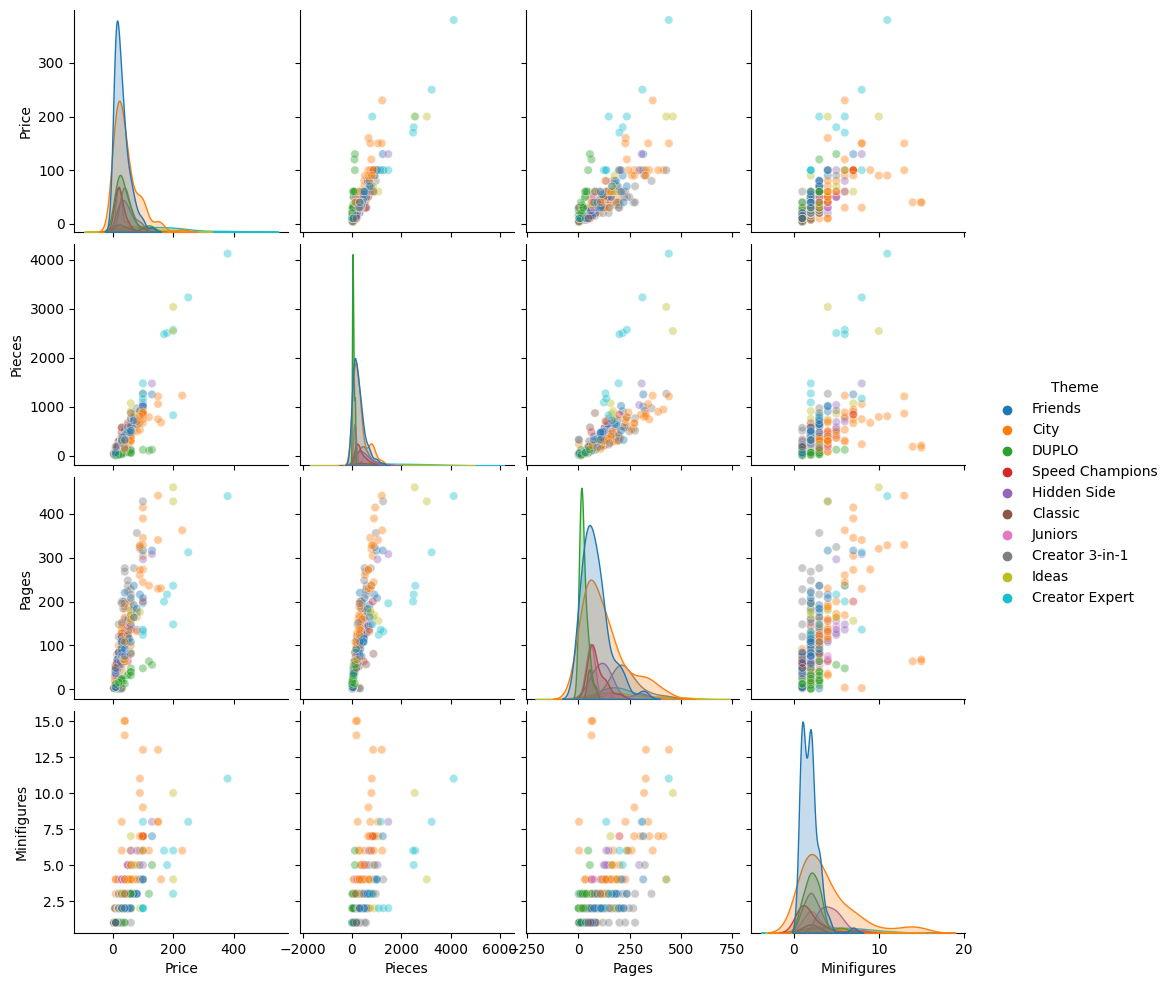

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


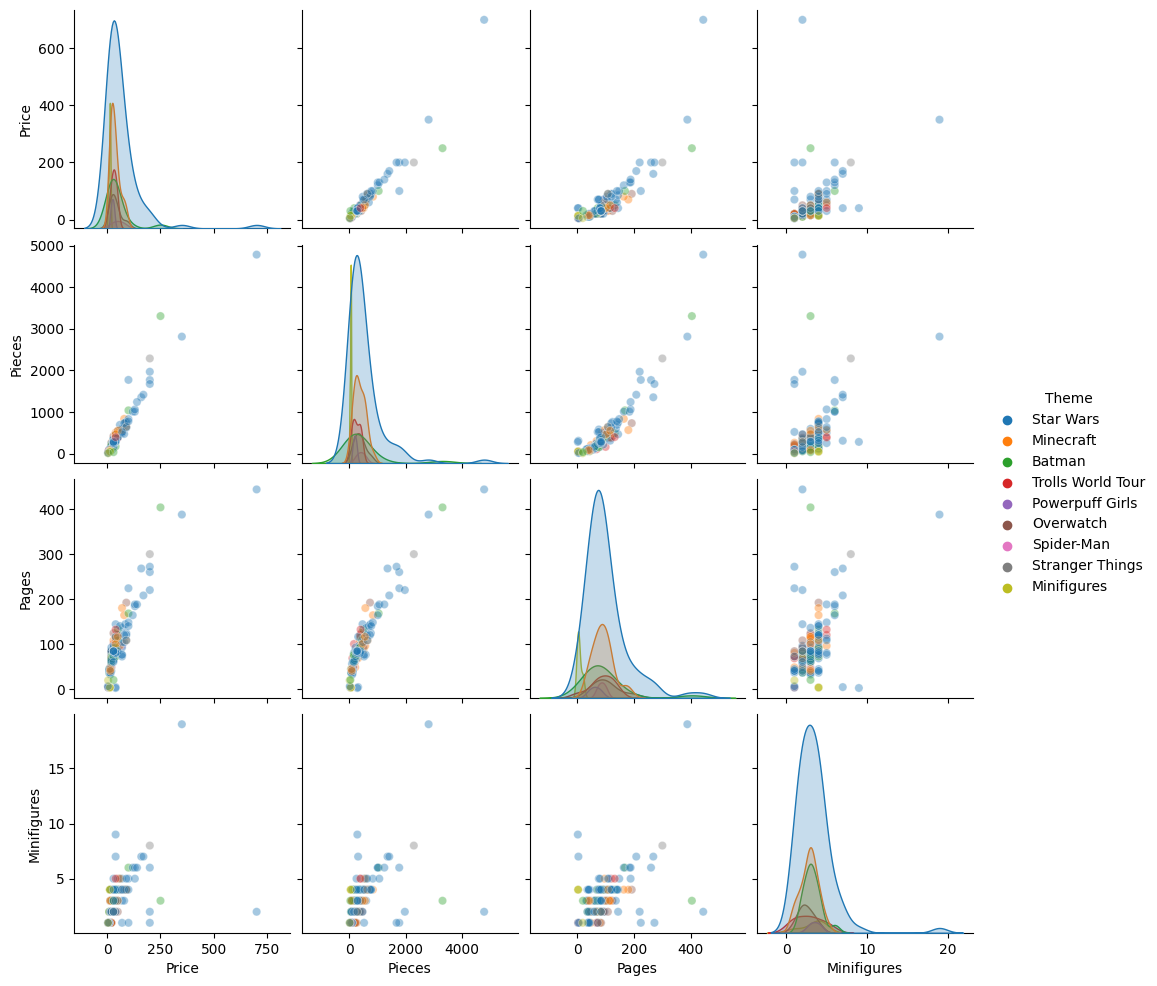

In [ ]:
def showMultipleScatterPlotts(arr):
    subset_df = df2[df2['Theme'].isin(arr)]
    sns.pairplot(subset_df, vars = ['Price', 'Pieces', 'Pages', 'Minifigures'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
    plt.show()


showMultipleScatterPlotts(mythemes_brands)
showMultipleScatterPlotts(mythemes_notBrands)
showMultipleScatterPlotts(mythemes_unclearBrands)

### Enkel og flere regresjonslinjer (ikke multippel)

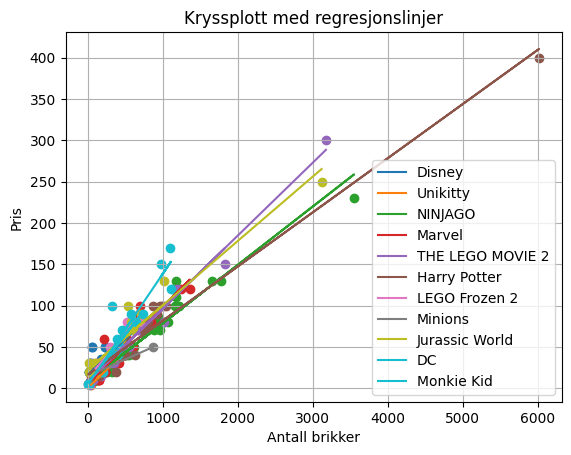

In [118]:
subset_df = df2[df2['Theme'].isin(mythemes_brands)]
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()

# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes_brands):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())

# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes_brands):
    slope = resultater[i].params['Pieces']
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

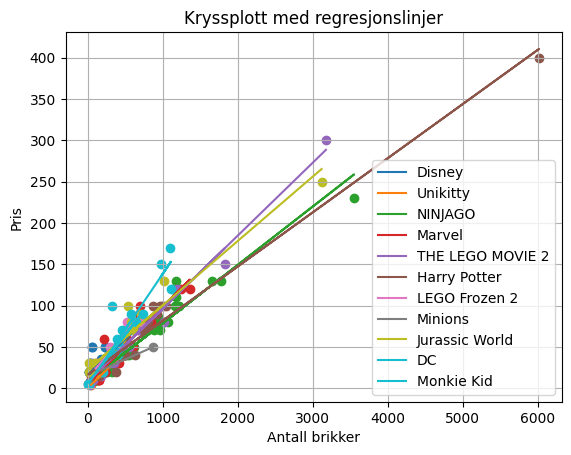

In [119]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols('Price ~ Pieces' , data = subset_df).fit()
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes_brands):
    modell3 = smf.ols('Price ~ Pieces' , data = subset_df[subset_df['Theme'].isin([theme])])
    resultater.append(modell3.fit())
    
def showMultipleRegressionLine(arr):
# plott av dataene og regresjonslinjene
    for i, theme in enumerate(arr):
        slope = resultater[i].params['Pieces']
        intercept = resultater[i].params['Intercept']

        regression_x = np.array(subset_df[subset_df['Theme'].isin([theme])]['Pieces'])
        regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
        plt.scatter(subset_df[subset_df['Theme'].isin([theme])]['Pieces'], subset_df[subset_df['Theme'].isin([theme])]['Price'], color=plt.cm.tab10(i))
        plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
    plt.xlabel('Antall brikker')
    plt.ylabel('Pris')
    plt.title('Kryssplott med regresjonslinjer')
    plt.legend()
    plt.grid()
    plt.show()


showMultipleRegressionLine(mythemes_brands)
#showMultipleRegressionLine(mythemes_notBrands)
#showMultipleRegressionLine(mythemes_unclearBrands)

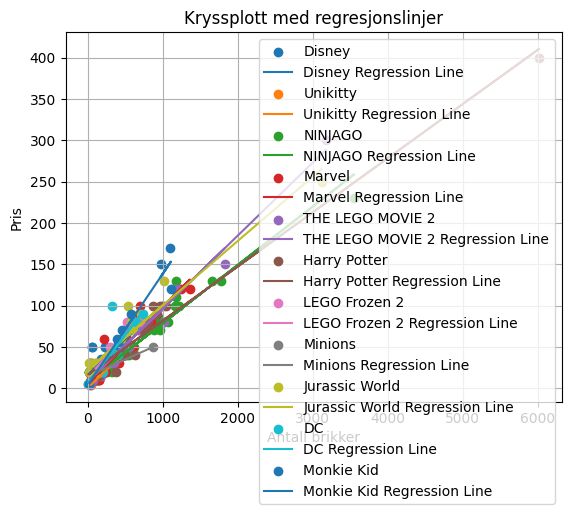

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data for theme: Friends
No data for theme: City
No data for theme: DUPLO
No data for theme: Speed Champions
No data for theme: Hidden Side
No data for theme: Classic
No data for theme: Juniors
No data for theme: Creator 3-in-1
No data for theme: Ideas
No data for theme: Creator Expert
No data for theme: Powered up
No data for theme: LEGO Education


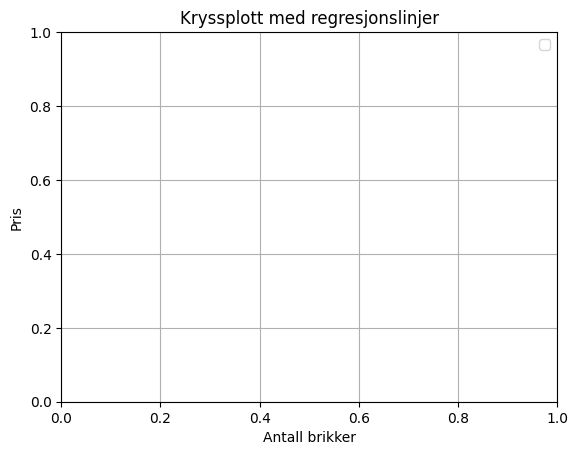

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No data for theme: Star Wars
No data for theme: Minecraft
No data for theme: Batman
No data for theme: Trolls World Tour
No data for theme: Powerpuff Girls
No data for theme: Overwatch
No data for theme: Spider-Man
No data for theme: Stranger Things
No data for theme: Minifigures


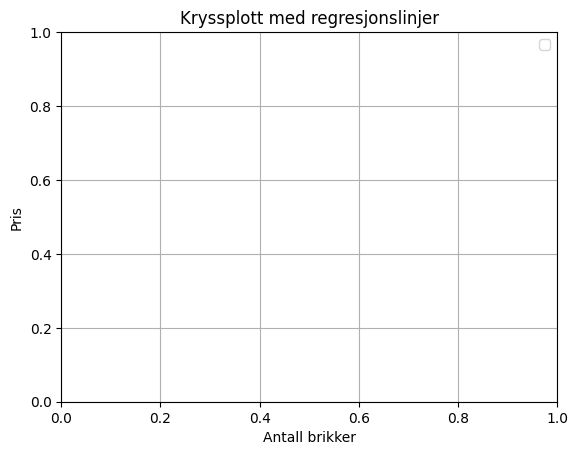

In [120]:
# TODO needs fixup and review
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

subset_df = df2[df2['Theme'].isin(mythemes_brands)]


def showMultipleRegressionLine(arr):
    resultater = []
    for theme in arr:
        theme_subset = subset_df[subset_df['Theme'] == theme]
        if theme_subset.empty:
            print(f"No data for theme: {theme}")
            continue
        model = smf.ols('Price ~ Pieces', data=theme_subset).fit()
        resultater.append((theme, model))

    for theme, res in resultater:
        slope = res.params['Pieces']
        intercept = res.params['Intercept']

        theme_subset = subset_df[subset_df['Theme'] == theme]
        regression_x = np.array(theme_subset['Pieces'])
        regression_y = slope * regression_x + intercept

        plt.scatter(theme_subset['Pieces'], theme_subset['Price'], label=theme)
        plt.plot(regression_x, regression_y, label=f'{theme} Regression Line')

    plt.xlabel('Antall brikker')
    plt.ylabel('Pris')
    plt.title('Kryssplott med regresjonslinjer')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with the array of themes
showMultipleRegressionLine(mythemes_brands)
showMultipleRegressionLine(mythemes_notBrands)
showMultipleRegressionLine(mythemes_unclearBrands)


### Evaluering av modeller

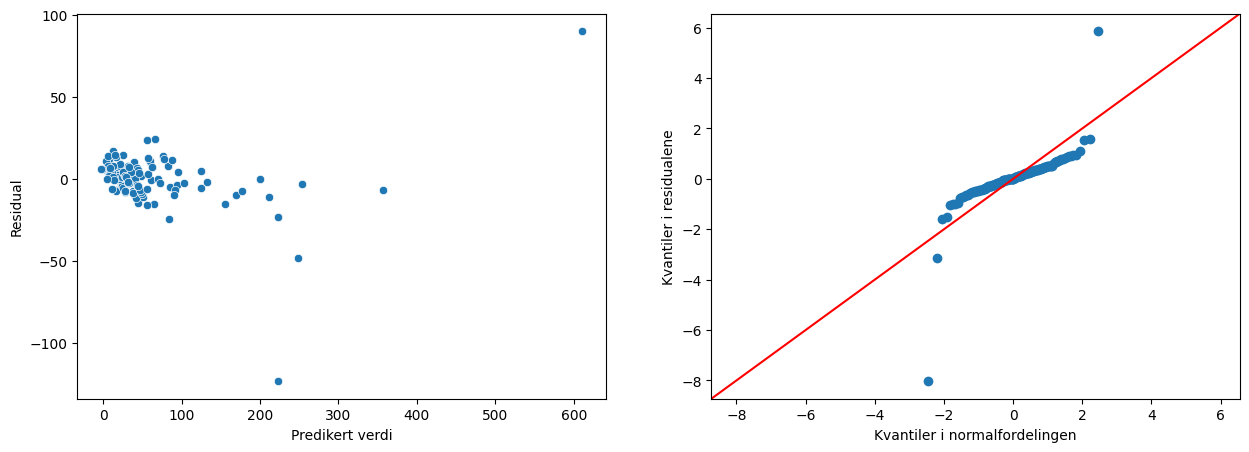

In [124]:
subset_df = df2[df2['Theme'].isin(mythemes_unclearBrands)]

# Steg 5: Evaluere om modellen passer til dataene
# med interaksjonsledd mellom antall brikker og tema

modell3_mlri = smf.ols('Price ~ Pieces*Theme' , data = subset_df)
modell3_mlri.fit().summary()

# Plotte predikert verdi mot residual

figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()